In [24]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train_tweet.csv")
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
train.drop("id",inplace=True,axis=1)

In [4]:
import nltk

In [5]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def clean_sentences(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9^,!.\/']", " ", text) #remove special characters
    text = " ".join(text.split())
    text = " ".join(stemmer.stem(word) for word in text.split())#stem each word in dataset
    return text

In [6]:
X = train['tweet']
y = train['label']

In [7]:
X = X.map(lambda a: clean_sentences(a))

In [8]:
X.head()

0    user when a father is dysfunct and is so selfi...
1    user user thank for lyft credit i can't use ca...
2                                  bihday your majesti
3    model i love u take with u all the time in ur !!!
4                          factsguid societi now motiv
Name: tweet, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [12]:
X_train.head()

1036     user like the spread of peanut butter on white...
2380     watch made in america o.j. simpson..... 30for3...
31605             franci underwood seen leav marseil nojok
23437    get up get get enjoy music today free app free...
2669     my 1st juic experience! notsobad healthyliv ea...
Name: tweet, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [15]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.05, tol=0.5)#c-regularization parameter(reg inv. prop to c), tol-tolerance for stopping criteria
model.fit(X_train,y_train)

LinearSVC(C=1.05, tol=0.5)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7430
           1       0.85      0.60      0.70       561

    accuracy                           0.96      7991
   macro avg       0.91      0.79      0.84      7991
weighted avg       0.96      0.96      0.96      7991



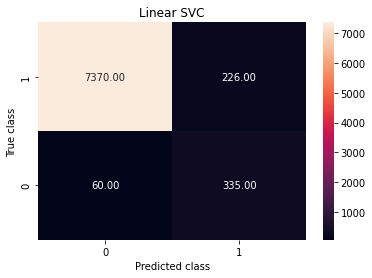

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=model.predict(X_test)
forest_cm=confusion_matrix(y_pred,y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ['0', '1'] , yticklabels = ['1', '0'])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Linear SVC')
print(classification_report(y_test, y_pred))